In [1]:
# allows to import own functions
import sys
import os
import re
root_project = re.findall(r'(^\S*TFM-master)', os.getcwd())[0]
sys.path.append(root_project)

from src.utils.help_func import results_searchcv,plot_predictions,\
    errors_distribution, plot_visualizations, get_model_data, results_estimator
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import pandas as pd
from scipy.stats import randint
import joblib
import seaborn as sns
sns.set()
import time
from scipy.stats import uniform, randint, loguniform


/disks/hdd2T/Drive/TFM-master/conda_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Get the data
df_train_val = get_model_data(500000)

# Feature selection
features = [
    'Tr',
    'inf_pow_1',
    'inf_pow_2',
    'mort_pow_1',
    'mort_pow_2',
    'mort_pow_3',
    'n_closed',
    'react_time',
    'total_deceased',
    'betweenness',
    'degree',
    'closeness',
    'country_pop',
    'country_departures',
    'exposed_pop',
    'inf_pow_1_log',
    'inf_pow_2_log',
    'mort_pow_1_log',
    'mort_pow_2_log',
    'mort_pow_3_log',
    ]

df_train_val = df_train_val[features]

print("=" * 20)
print(f"Train_validation size: {df_train_val.shape}")
print("=" * 20)


X_train_val = df_train_val.drop('total_deceased', axis=1)
y_train_val = df_train_val['total_deceased']
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  random_state=42)

MODEL_NAME = 'xgboost'

LOAD_PATH = f"{root_project}/models/{MODEL_NAME}.pkl"


# Load a model
random_search = joblib.load(LOAD_PATH)

Train_validation size: (500000, 20)


In [10]:
df_test = pd.read_pickle(
    f"{root_project}/data/processed/test_set.pickle")

df_test = df_test[features]

X_test = df_test.drop('total_deceased', axis=1)
y_test = df_test['total_deceased']


results_estimator(random_search.best_estimator_, X_test, y_test)

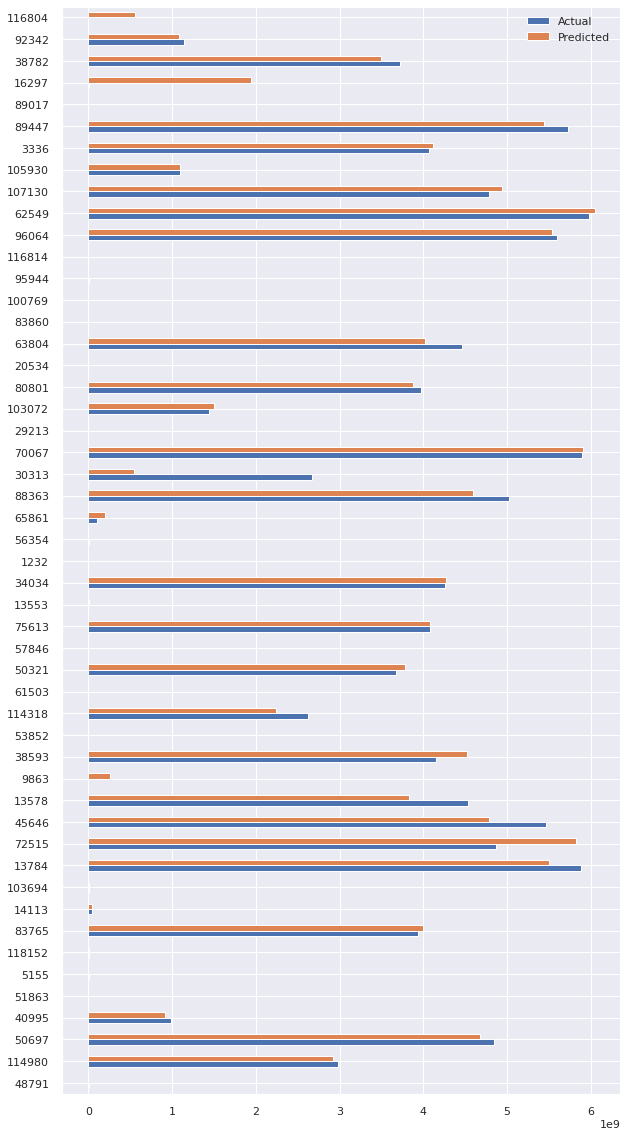

In [15]:
plot_predictions(random_search.best_estimator_, X_test, y_test, samples=50)